In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = np.loadtxt('data/outlier_1d.txt')
df2 = np.loadtxt('data/outlier_2d.txt')
df3 = np.loadtxt('data/outlier_curve.txt')

In [3]:
print(f'df1 shape: {df1.shape}')
print(f'df2 shape: {df2.shape}')
print(f'df3 shape: {df3.shape}')

df1 shape: (1010,)
df2 shape: (1010, 2)
df3 shape: (1000, 2)


In [4]:
df1

array([21.345, 20.2  , 14.346, ..., 16.769, 23.633, 21.388])

In [5]:
df2

array([[12.486, 19.387],
       [ 8.184, 23.854],
       [12.195, 14.544],
       ...,
       [ 8.06 , 20.962],
       [ 8.805, 17.617],
       [ 9.798, 16.666]])

In [6]:
df2[:, 0]

array([12.486,  8.184, 12.195, ...,  8.06 ,  8.805,  9.798])

In [7]:
df2[:, 1]

array([19.387, 23.854, 14.544, ..., 20.962, 17.617, 16.666])

In [8]:
df3[:, 0].shape

(1000,)

In [9]:
df3[:, 1].shape

(1000,)

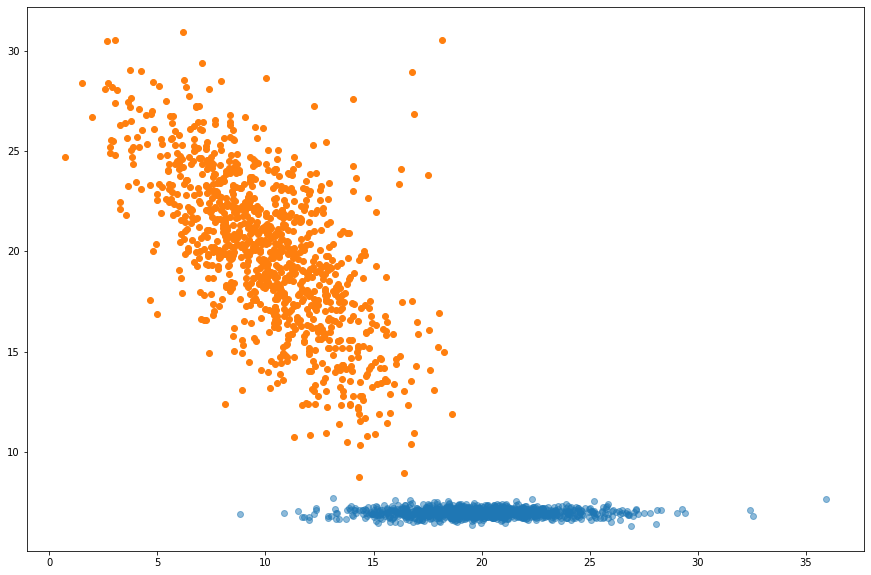

In [10]:
plt.figure(figsize = (15, 10))
plt.scatter(df1, np.random.normal(7, 0.2, df1.size), alpha = 0.5)
plt.scatter(df2[:, 0], df2[:, 1])
plt.show()

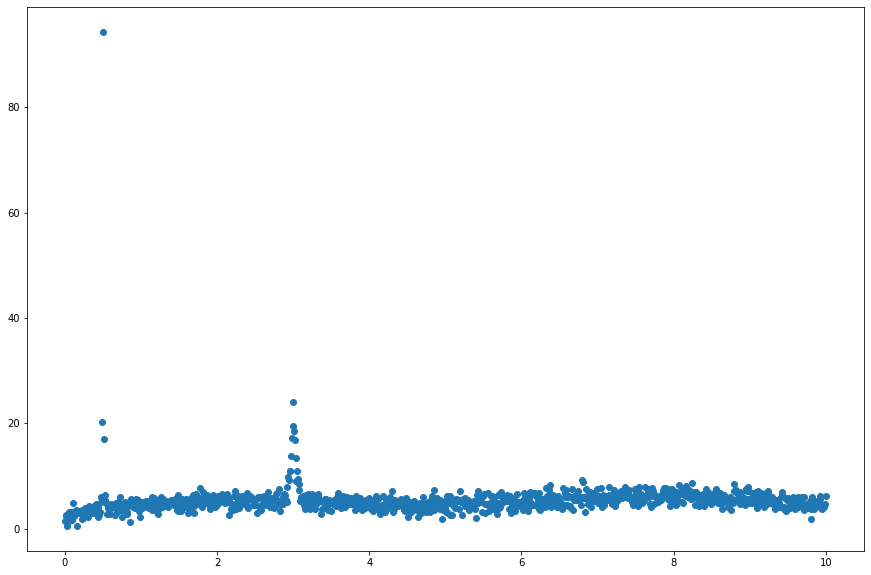

In [11]:
plt.figure(figsize = (15, 10))
plt.scatter(df3[:, 0], df3[:, 1])
plt.show()

# Basics

The most basic and most-common way of manually doing outlier pruning on data distributions is to:

1. Model your data as some analytic distribution
2. Find all points below a certain probability
3. Remove them
4. Refit the distributions, and potentially run again from Step 1.

In [12]:
df1_mean, df1_std = np.mean(df1), np.std(df1)

z_score = (df1 - df1_mean) / df1_std
threshold = 3

print('Z SCORE:')
print(z_score)

Z SCORE:
[ 0.45019095  0.08342515 -1.79172509 ... -1.01559099  1.18308192
  0.46396469]


In [13]:
good = z_score < threshold
print(f'Rejections are {(~good).sum()} points')

Rejections are 4 points


z-score of 3 corresponds to a prob of 0.27%


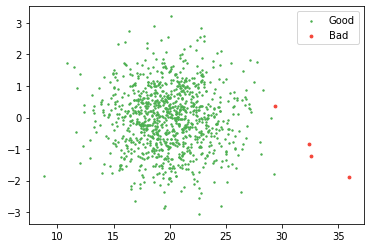

In [14]:
from scipy.stats import norm

print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")

visual_scatter = np.random.normal(size=df1.size)

plt.scatter(df1[good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(df1[~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")
plt.legend();